In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import folium
import json
import geopandas
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Tim\Desktop\Data Analytics Intro\6. Advanced Analytics & Dashboard Design\Global Superstore_Data Analysis Project'

In [4]:
super_store = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'superstore_clean.csv'))

In [5]:
# Select only the necessary columns and put them in a list called columns

columns = ["Sales",
"Profit",
"Shipping.Cost",
"Quantity"
]

In [6]:
# Create a subset

df = super_store[columns]

In [7]:
df.head()

,Sales,Profit,Shipping.Cost,Quantity
0,19,9.3312,4.37,3
1,19,9.2928,0.94,2
2,21,9.8418,1.81,3
3,111,53.2608,4.59,2
4,6,3.1104,1.32,1


In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
kmeans = [KMeans(n_clusters=i) for i in range(2, 11)]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

[-6714097292.246827,
 -4450534004.8741665,
 -3347215725.985548,
 -2628684148.9522753,
 -2216666008.1978364,
 -1935487535.951385,
 -1672124439.0765464,
 -1509151587.1260319,
 -1357628486.9394546]

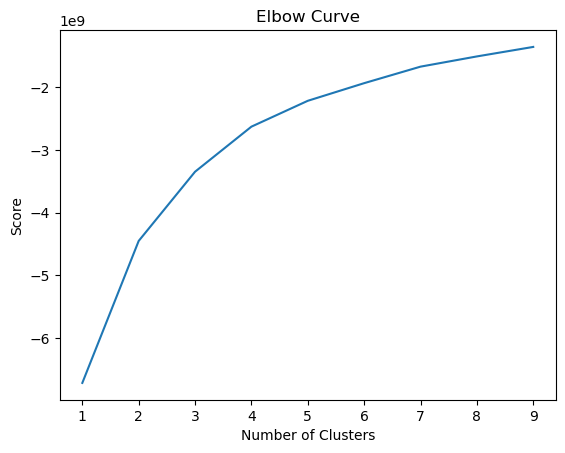

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [12]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [13]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Tim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tim\AppData\Local\Temp\ipykernel_27132\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [14]:
df.head()

,Sales,Profit,Shipping.Cost,Quantity,clusters
0,19,9.3312,4.37,3,0
1,19,9.2928,0.94,2,0
2,21,9.8418,1.81,3,0
3,111,53.2608,4.59,2,0
4,6,3.1104,1.32,1,0


In [15]:
df['clusters'].value_counts()

clusters
0    43255
3     6601
1     1328
2      106
Name: count, dtype: int64

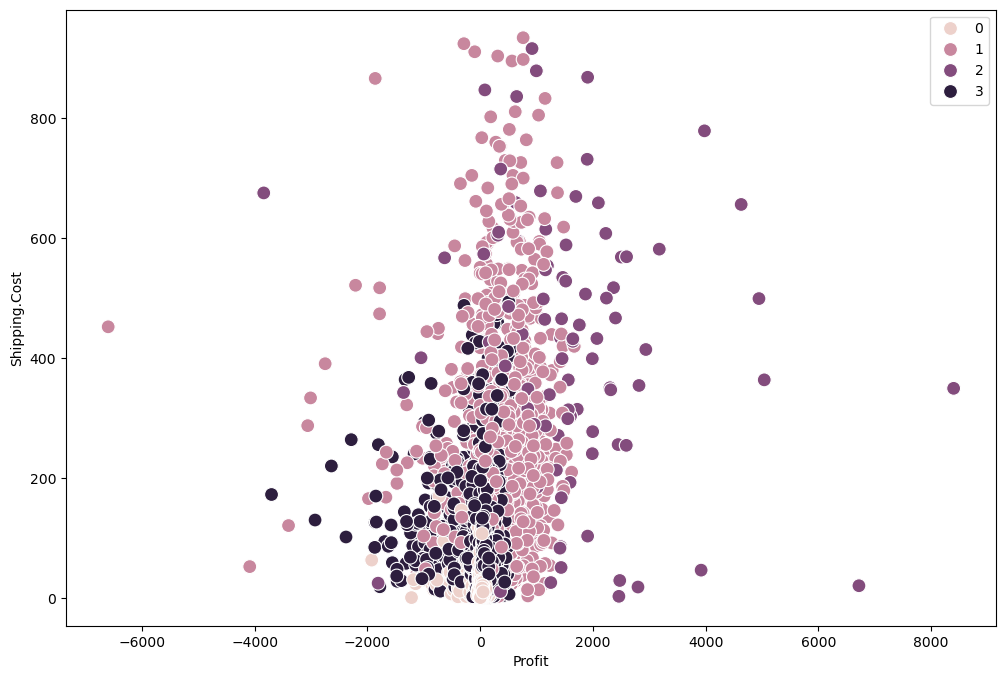

In [16]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Profit'], y=df['Shipping.Cost'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Profit') # Label x-axis.
plt.ylabel('Shipping.Cost') # Label y-axis.
plt.show()

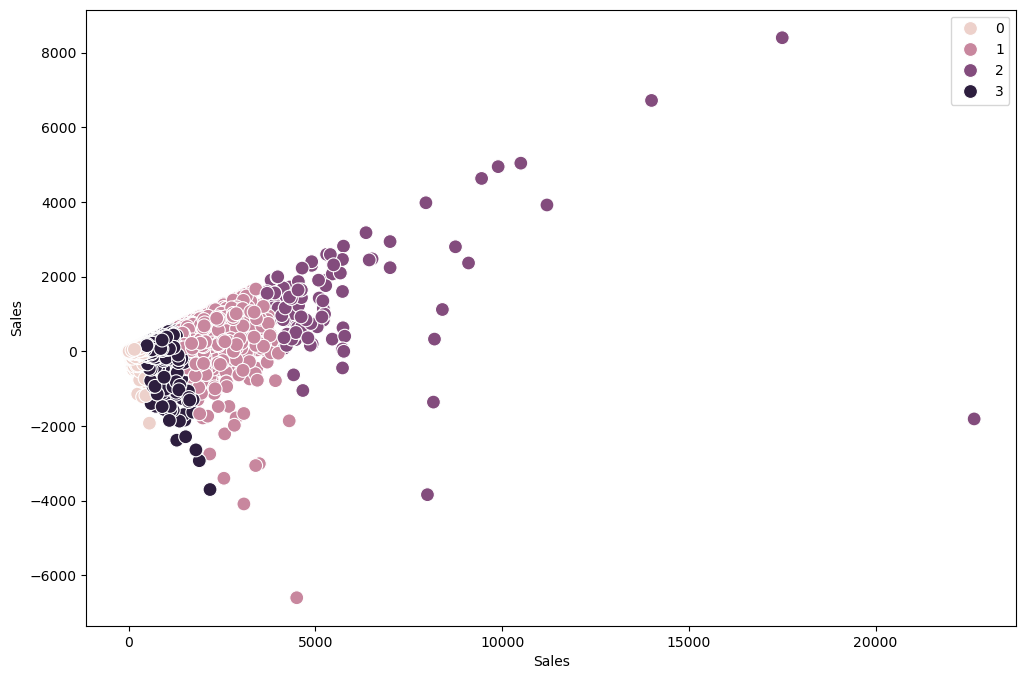

In [17]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Sales'], y=df['Profit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Sales') # Label x-axis.
plt.ylabel('Sales') # Label y-axis.
plt.show()

In [19]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple' 
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'pink'

In [20]:
df.groupby('cluster').agg({'Sales':['mean', 'median'], 
                         'Profit':['mean', 'median'], 
                         'Shipping.Cost':['mean', 'median'],
                          'Quantity':['mean', 'median']})

Sales               Profit            Shipping.Cost  \
                    mean  median         mean     median          mean   
cluster                                                                  
dark purple   740.052719   668.0    81.392834   106.7412     80.989749   
pink         5549.924528  4635.5  1430.389745  1399.6648    384.424010   
purple        160.812978    64.0    17.463201     7.5200     17.438338   

                      Quantity         
              median      mean median  
cluster                                
dark purple   63.770  4.610514    4.0  
pink         374.785  7.688679    7.0  
purple         5.990  3.298634    3.0